In [89]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from sklearn.preprocessing import StandardScaler

In [62]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')


In [ ]:
# Data Loading
df_train = pd.read_csv('train.csv')

In [64]:
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', None) 

# Data Overview

In [65]:
df_train.shape

(1460, 81)

In [66]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [68]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


categorical columns which are known as numeric: 'MSSubClass','OverallQual','OverallCond'
numeric values that are date: 'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd'

 BedroomAbvGr (Bedrooms above grade) is numeric (discrete integer), but may not have a strictly linear relationship with SalePrice.Keep as numeric for now; during EDA check correlation/plots. If the relationship is non-linear, consider treating it as categorical (e.g., small/medium/large bins).


In [69]:
df_cat = df_train.select_dtypes(include=['object'])
df_num = df_train.select_dtypes(exclude=['object'])
df_num.drop(columns=['Id'], inplace=True)

<Axes: >

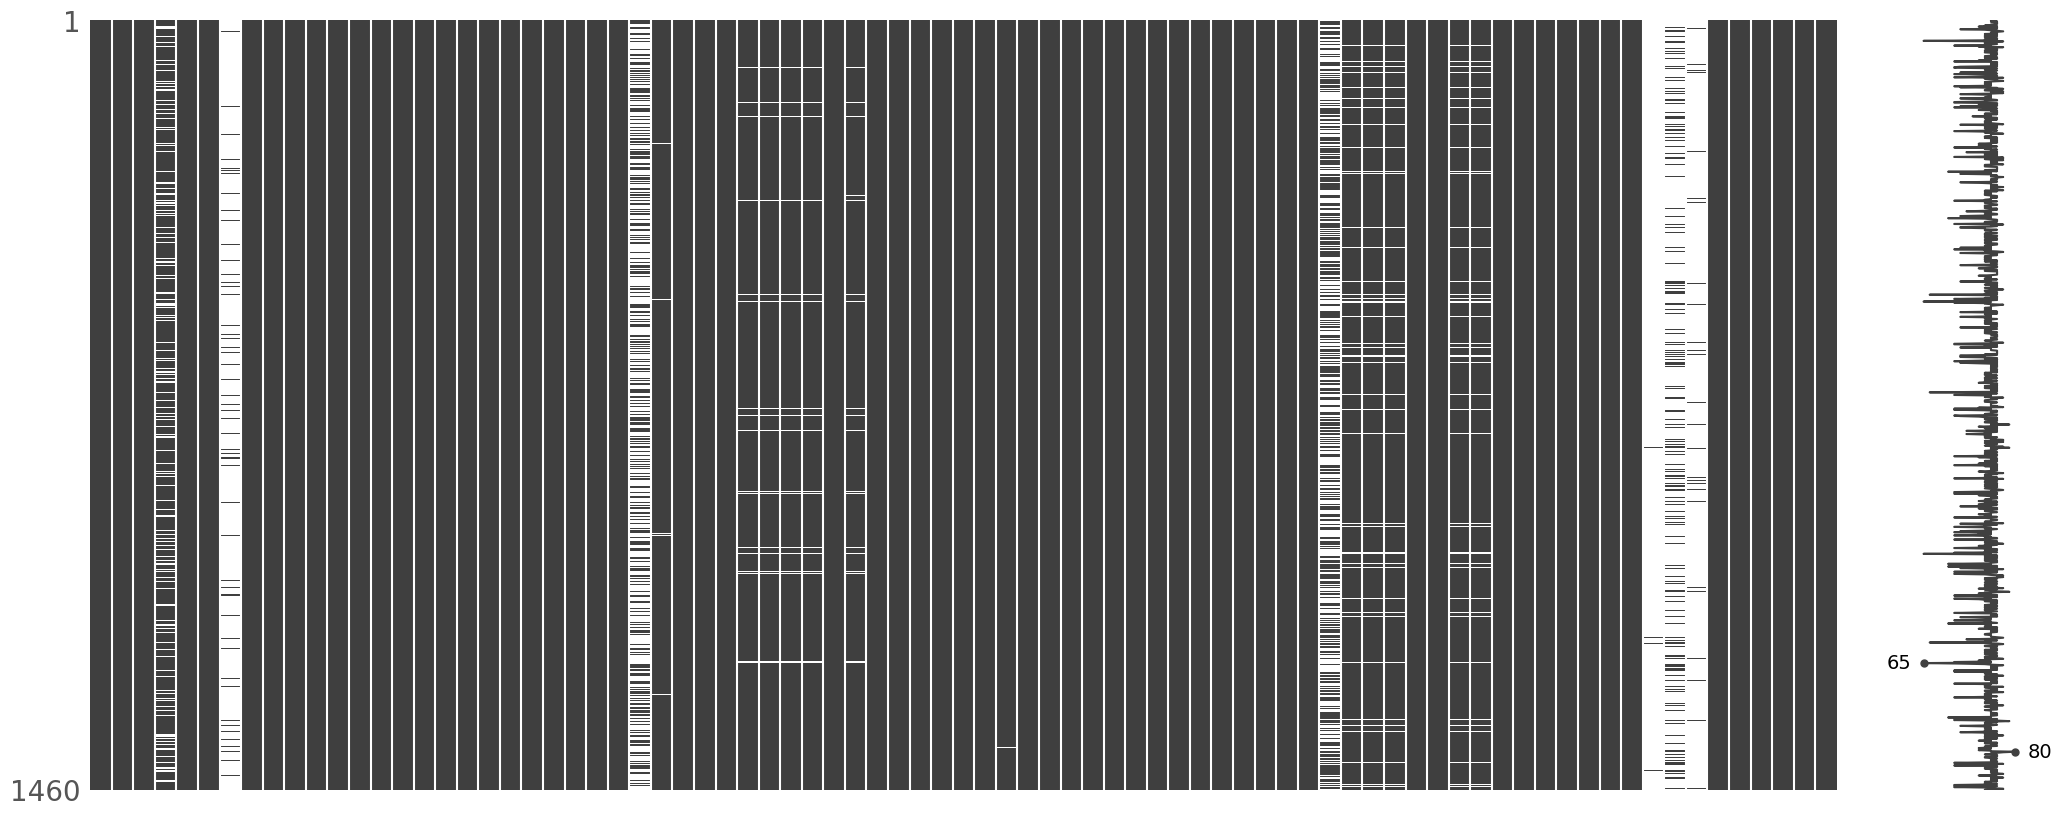

In [70]:
msno.matrix(df_train)

In [71]:
missing_sum = df_train.isnull().sum().sort_values(ascending=False)
missing_percent = missing_sum / len(df_train) * 100
missing_data = pd.concat([missing_sum, missing_percent], axis=1, keys=['Total Missing', 'Percent Missing'])
missing_data.head(20)

,Total Missing,Percent Missing
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945


In [72]:
cat_summary = pd.DataFrame({
    'unique_counts': df_cat.nunique(),
    'top_values': df_cat.mode().iloc[0],
    'top_freq': df_cat.apply(lambda x: x.value_counts().iloc[0])
})
cat_summary.sort_values('unique_counts', ascending=False).head(50)

,unique_counts,top_values,top_freq
Neighborhood,25,NAmes,225
Exterior2nd,16,VinylSd,504
Exterior1st,15,VinylSd,515
SaleType,9,WD,1267
Condition1,9,Norm,1260
Condition2,8,Norm,1445
HouseStyle,8,1Story,726
RoofMatl,8,CompShg,1434
Functional,7,Typ,1360
BsmtFinType2,6,Unf,1256


The categorical variable scan shows a wide range of cardinality across features. Variables like Neighborhood (25 categories) and the exterior material features (Exterior1st, Exterior2nd) are highly diverse and will require careful encoding to capture their information. Mid-range features such as HouseStyle, RoofStyle, SaleType present a manageable number of categories suitable for one-hot encoding. On the other hand, some variables such as Utilities, Street, Condition2 are heavily dominated by a single value, meaning they may contribute little predictive power. Quality-related variables (ExterQual, KitchenQual, BsmtQual, GarageQual, HeatingQC) are ordinal in nature and should be treated with ordered encodings rather than dummy variables. Finally, features with substantial missingness (PoolQC, Alley, Fence, MiscFeature) likely indicate true absence rather than random missing data, and will need to be recoded appropriately during preprocessing.

# EDA

<Axes: >

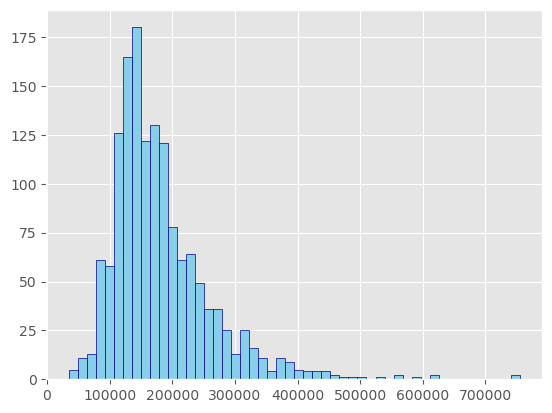

In [73]:
df_train['SalePrice'].hist(bins=50,color='skyblue', edgecolor='navy')

<Axes: >

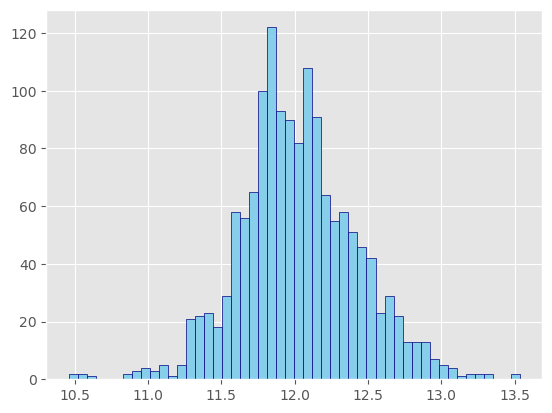

In [74]:
np.log1p(df_train['SalePrice']).hist(bins=50,color='skyblue', edgecolor='navy')

SalePrice is strongly right-skewed with a few very expensive houses.
Applying log1p(SalePrice) makes the distribution closer to normal,
reduces the influence of extreme outliers, and aligns with the competition metric (RMSE on log prices).
→ Visualize both raw and log SalePrice in EDA, but use the log-transformed version for modeling.


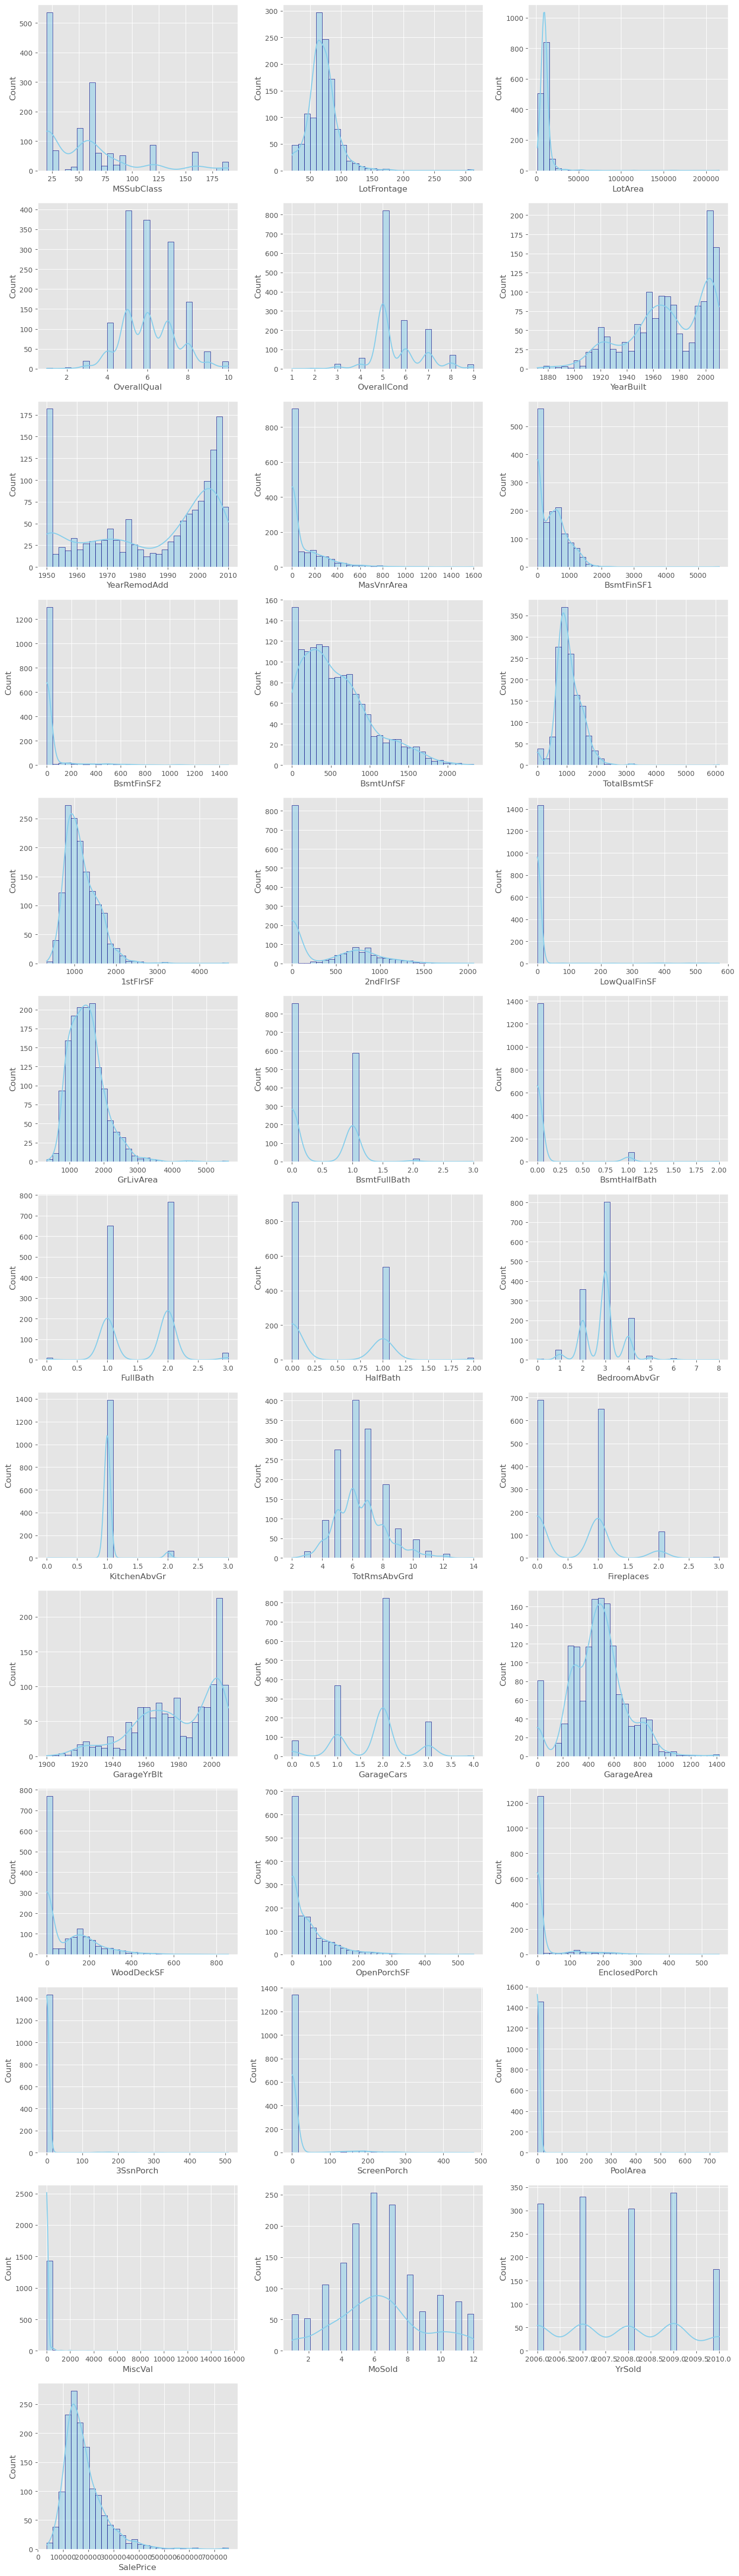

In [75]:

# number of plots per row
n_cols = 3  

# total rows needed
n_rows = int(np.ceil(len(df_num.columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()  # make it 1D for easy indexing

for i, col in enumerate(df_num.columns):
    sns.histplot(df_num[col].dropna(), kde=True, ax=axes[i], bins=30,color='skyblue', edgecolor='navy')

# turn off empty axes if columns < rows*cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()

The target variable SalePrice is right-skewed. This is common in housing prices, and a log transformation will help normalize it for regression models.

Many continuous features (e.g., LotArea, TotalBsmtSF, GrLivArea, GarageArea) are also skewed with a few extreme outliers. These may benefit from log transformation or outlier handling.

Some variables, such as MSSubClass, MoSold, YrSold, are stored as numbers but actually represent categories (types of property, month of sale, year of sale). These should be treated as categorical features instead of continuous. we also need to add AgeatSale column.

Discrete count features (like OverallQual, Fireplaces, GarageCars) are integers with clear spikes and should be handled carefully (they’re ordinal rather than continuous).

In [76]:
# corrolation matrix
corr = df_num.corr()['SalePrice'].sort_values(ascending=False)
corr.head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

<Axes: >

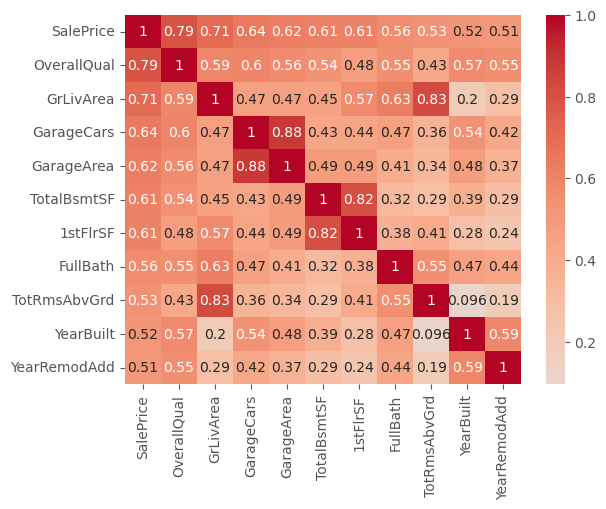

In [77]:
top_corr = corr.index[:11]  # SalePrice + top 10
sns.heatmap(df_num[top_corr].corr(), annot=True, cmap="coolwarm", center=0)

SalePrice shows the strongest positive correlations with OverallQual, GrLivArea, GarageCars, GarageArea, and TotalBsmtSF. Some predictors (like GarageCars & GarageArea, or GrLivArea & TotRmsAbvGrd) are highly correlated with each other, which we’ll handle later using models robust to multicollinearity (Lasso, Random Forest, XGBoost)

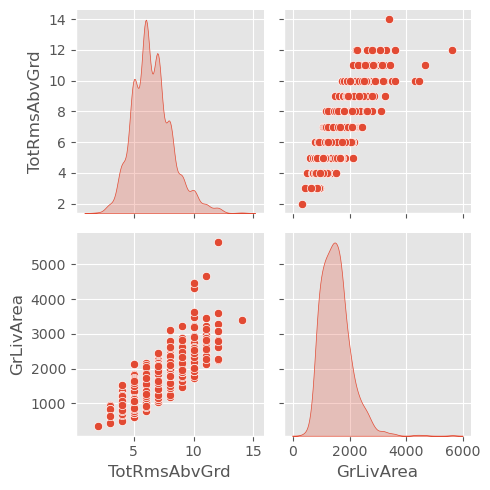

In [78]:
# Pairplot for selected features
sns.pairplot(df_num[['TotRmsAbvGrd', 'GrLivArea']], diag_kind="kde")
plt.tight_layout()


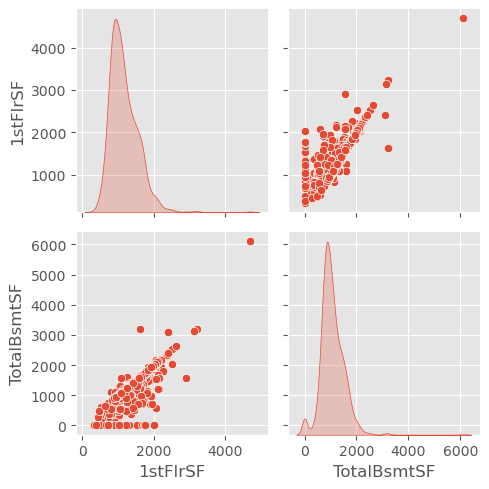

In [79]:
# Pairplot for selected features
sns.pairplot(df_num[['1stFlrSF', 'TotalBsmtSF']], diag_kind="kde")
plt.tight_layout()


Features that capture house size are strongly correlated. For example, 1stFlrSF and TotalBsmtSF are positively related, and GrLivArea is strongly correlated with TotRmsAbvGrd. This indicates multicollinearity among size-related features, which is expected. While they all provide similar information, regularization methods (like Lasso) or tree-based models (Random Forest, XGBoost) can help manage redundancy

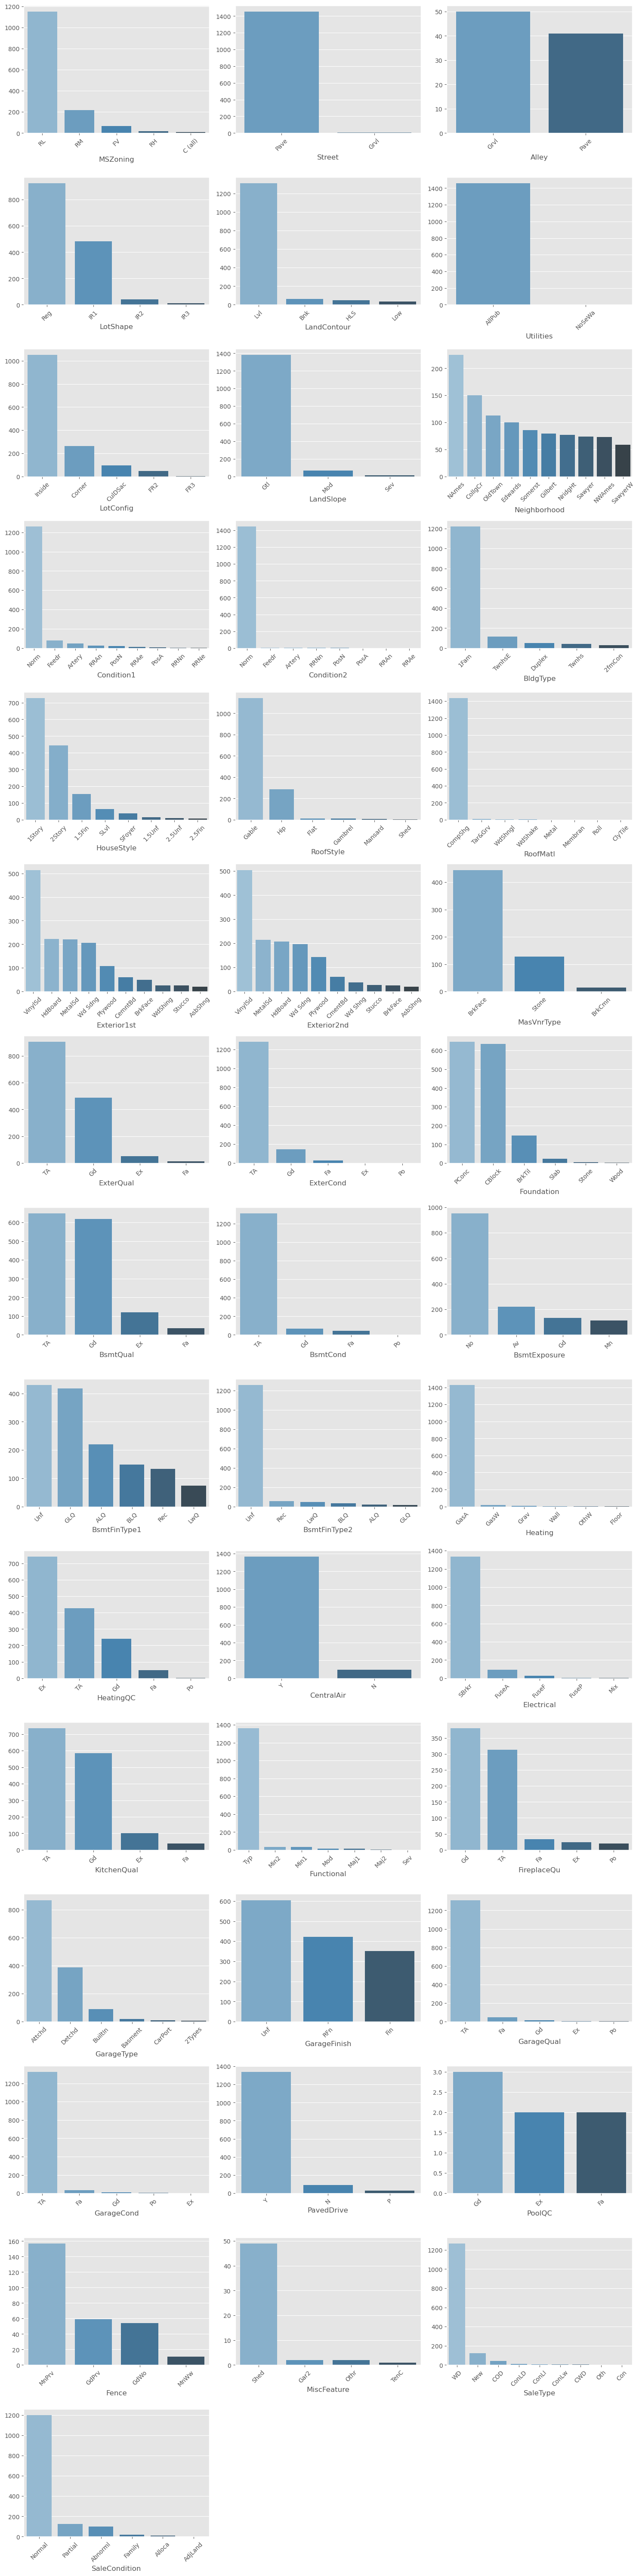

In [80]:
# number of plots per row
n_cols = 3  
# total rows needed
n_rows = int(np.ceil(len(df_cat.columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()  # make it 1D for easy indexing

for i, col in enumerate(df_cat.columns):
    # Get top 10 categories
    value_counts = df_cat[col].value_counts().head(10)

    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette="Blues_d")
    axes[i].tick_params(axis='x', rotation=45)
# turn off empty axes if columns < rows*cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()


Most categorical variables are highly imbalanced — for example, almost all houses have Paved streets, AllPub utilities, and a typical Functional rating. Some categories dominate (like Vinyl/Metal siding in Exterior), while others have very few observations (e.g., Alley, PoolQC, MiscFeature). These rare categories may have limited predictive power but could still capture niche effects. Key categorical variables with more balanced spread include Neighborhood, HouseStyle, and Exterior materials.

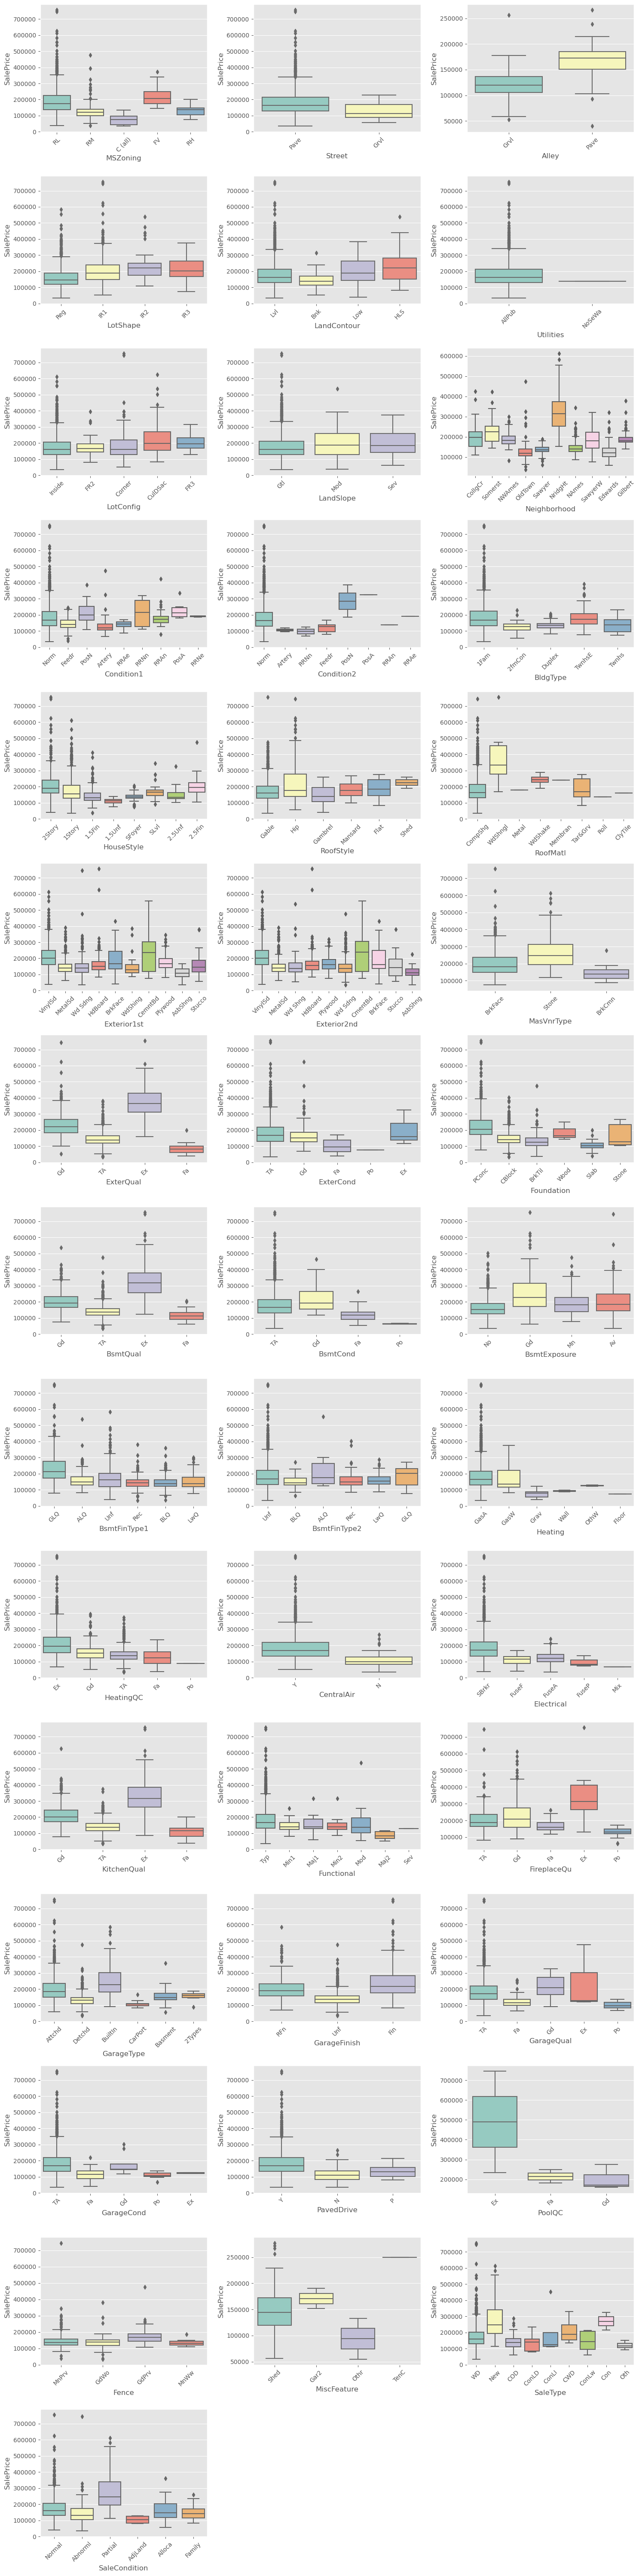

In [81]:
# number of plots per row
n_cols = 3
n_rows = int(np.ceil(len(df_cat.columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(df_cat.columns):
    # Take only top 10 categories (by frequency)
    top_categories = df_cat[col].value_counts().head(10).index
    data_subset = df_train[df_cat[col].isin(top_categories)]

    sns.boxplot(x=col,y="SalePrice", data=data_subset,ax=axes[i], palette="Set3")
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Several categorical features show clear differences in SalePrice distributions across their categories. For example, houses  located in certain Neighborhoods (like NridgHt, NoRidge, StoneBr) tend to sell for significantly higher prices. In contrast, many categorical variables (such as Street, Utilities, RoofMatl) have little variation across categories and may provide limited predictive power. This suggests that feature selection or regularization will be important later.

# Feature Engineering

### NAs

In [82]:
df_train.loc[df_train['PoolArea'] == 0, ['PoolArea', 'PoolQC']].value_counts()
df_train.loc[df_train['PoolArea'] == 0, 'PoolQC'].unique()

array([nan], dtype=object)

In [ ]:
# Features where NaN means "no such feature"
none_fill = {
    'PoolQC': 'No Pool',
    'Fence': 'No Fence',
    'Alley': 'No Alley',
    'MiscFeature': 'No MiscFeature',
    'FireplaceQu': 'No Fireplace',
    'MasVnrType': 'No Masonry Veneer'
}

# Numeric features where NaN = 0
zero_fill = ['MasVnrArea', 'GarageYrBlt']

# Garage categorical features
garage_cat_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

# Basement categorical features
bsmt_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for df in [df_train]:
    # Fill categorical "None" values
    for col, value in none_fill.items():
        df[col].fillna(value, inplace=True)

    # Fill numeric zeros
    for col in zero_fill:
        df[col].fillna(0, inplace=True)

    # Garage categorical
    for col in garage_cat_cols:
        df[col].fillna('None', inplace=True)

    # Basement categorical
    for col in bsmt_cols:
        df[col].fillna('None', inplace=True)

    # LotFrontage: fill by Neighborhood median
    df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
        lambda x: x.fillna(x.median())
    )

# Electrical: only in train, fill with mode
df_train['Electrical'].fillna(df_train['Electrical'].mode()[0], inplace=True)

# Electrical (1 row only)

df_train['Electrical'].fillna('SBrkr', inplace=True)

In this step we create and transform features to improve model performance.
Log-transforming the target (SalePrice): SalePrice is highly skewed with extreme outliers. Applying log makes the distribution closer to normal, which helps linear models capture relationships better. It also reduces the influence of very expensive houses, and aligns with the competition metric (RMSE on log prices).

In [88]:
# log transform skewed numerical features

df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

# features to log
log_features = [
    "LotArea", "MasVnrArea", "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "GrLivArea",
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
    "GarageArea", "WoodDeckSF", "OpenPorchSF",
    "EnclosedPorch", "3SsnPorch", "ScreenPorch",
    "PoolArea", "MiscVal"
]

for col in log_features:
    df_train[col] = np.log1p(df_train[col])

In [90]:
# columns to normalize
norm_cols = [
    "LotFrontage", "LotArea", "MasVnrArea", "TotalBsmtSF",
    "1stFlrSF", "2ndFlrSF", "GrLivArea",
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
    "GarageArea", "WoodDeckSF", "OpenPorchSF",
    "EnclosedPorch", "3SsnPorch", "ScreenPorch",
    "PoolArea", "MiscVal"
]

scaler = StandardScaler()

# fit and transform only train data
df_train[norm_cols] = scaler.fit_transform(df_train[norm_cols])

In [91]:
# House age at time of sale
df_train["HouseAge"] = df_train["YrSold"] - df_train["YearBuilt"]

# Years since remodel
df_train["RemodAge"] = df_train["YrSold"] - df_train["YearRemodAdd"]